<a href="https://colab.research.google.com/github/Gauravmehra1/play-store-app-analysis/blob/main/capstone_project_on_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

**Import Libraries**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Importing data from google colab** 

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
File ='/content/drive/MyDrive/EDA/PlayStore.csv'
df=pd.read_csv(File)

#**Checking columns , shape and first 5 element** 

In [ ]:
df.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df.shape

(10841, 13)

In [ ]:
df.head(340)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
337,Messenger for SMS,COMMUNICATION,4.3,125257,17M,"10,000,000+",Free,0,Teen,Communication,"June 6, 2018",1.8.9,4.1 and up
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device


**Play store data frame has 13 rows and 10841 columns**

**App**- It will tell about the name of apps in data frame 

**category** -It tells the app catagory 

**Rating** - In this we will know about the rating of app 

**Reviews** - It tell us the reviews give by the users 

**Size** - It tells us about the size of application in our moblie phone 

**Installs** - It will lets us know about the downloads

**Type**- Tell us the app is free or paid 

**Price**- It will  give us the app price and for free app it will give Zero

**content rating** - It will tell us the app can be used by everyone or by teen 

**Genres**-it tells us about the various other categories to which an application can belong.

**Last updated**- It tells us when app updated 

**Current ver**- It tells us the updated version of the app 

**Android ver**- It tell us which android version is used by the app












In [ ]:
#taking info of our data frame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# printing duplicate rows and coloumn 
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


**we will take data of all Duplicate app and will drop them**

In [ ]:
df.drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
df.drop_duplicates(subset=['App'])


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#**Asalysis on APP**

In [ ]:
#takinf first 5 app 
df['App'].head(5)

0       Photo Editor & Candy Camera & Grid & ScrapBook
1                                  Coloring book moana
2    U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                Sketch - Draw & Paint
4                Pixel Draw - Number Art Coloring Book
Name: App, dtype: object

In [ ]:
#counting the number of time each App appers 
pd.value_counts(df['App'].values)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Length: 9660, dtype: int64

In [ ]:
#taking out the uniique App
df['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [ ]:
#droping down the Duplicat App
df.drop_duplicates(['App'],inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
#checking if our duplicate values has been droped 
pd.value_counts(df['App'].values)

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Length: 9660, dtype: int64

In [ ]:
df[df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


#**Asalysis Category**

In [ ]:
df['Category'].head(5)

0    ART_AND_DESIGN
1    ART_AND_DESIGN
2    ART_AND_DESIGN
3    ART_AND_DESIGN
4    ART_AND_DESIGN
Name: Category, dtype: object

In [ ]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
pd.value_counts(df['Category'].values)

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
dtype: int64

**Last value is 1.9 which in not a correct category We will replace this with NAN**

In [ ]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#replacing 1.9 with NAN using swip method 
df.loc[10472,'App']=df.loc[10472,'Category']
df.loc[10472,'Category']=np.nan
df.loc[10472]

App                             1.9
Category                        NaN
Rating                         19.0
Reviews                        3.0M
Size                         1,000+
Installs                       Free
Type                              0
Price                      Everyone
Content Rating                  NaN
Genres            February 11, 2018
Last Updated                 1.0.19
Current Ver              4.0 and up
Android Ver                     NaN
Name: 10472, dtype: object

Text(0.5, 0, 'app categories')

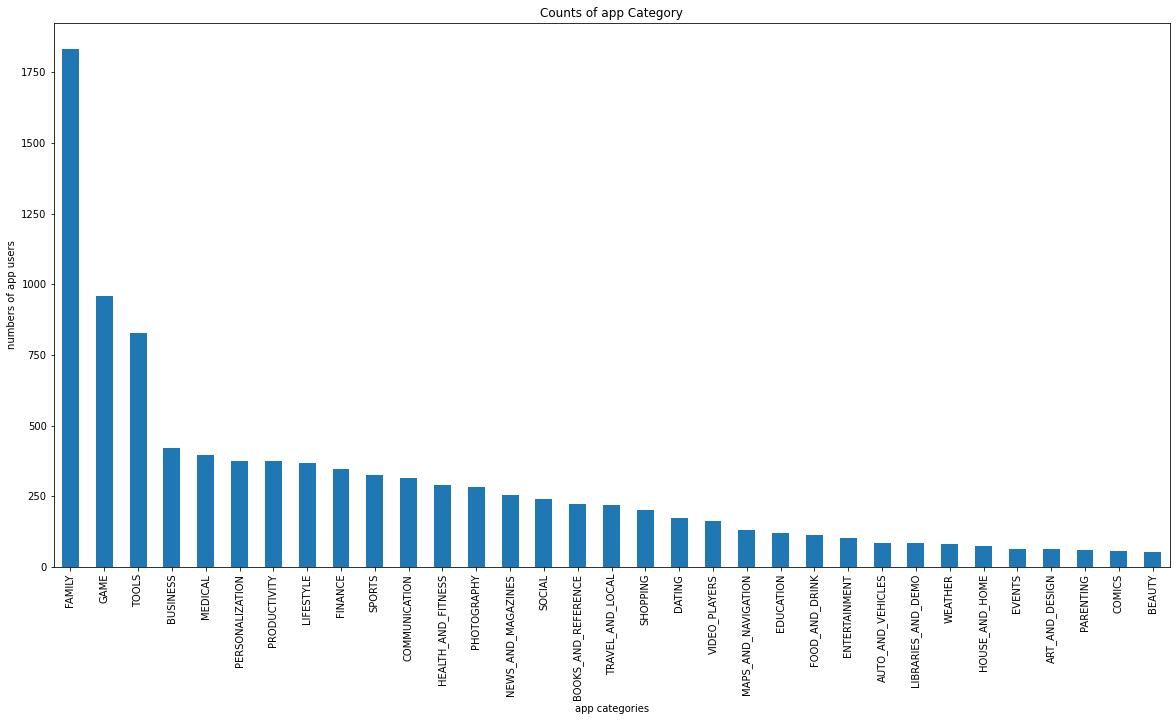

In [ ]:
#Ploting in terms of app category 

plt.rcParams['figure.figsize'] = (20, 10)
df['Category'].value_counts().plot(kind='bar')
plt.title('Counts of app Category')
plt.ylabel('numbers of app users')
plt.xlabel('app categories')

#**Rating**

In [ ]:
#we are taking the top 10 values of Rating
df['Rating'].head(10)

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
5    4.4
6    3.8
7    4.1
8    4.4
9    4.7
Name: Rating, dtype: float64

In [ ]:
#finding out the NaN rating
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
#Replacing nan rating with 0 
df.fillna({'Rating':0},inplace=True)


In [ ]:
#checking the values are replace with 0 
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        0. ,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
#checking the numbers of apps as per there reating 
pd.value_counts(df['Rating'].values)

0.0     1463
4.3      897
4.4      895
4.5      848
4.2      810
4.6      683
4.1      621
4.0      513
4.7      442
3.9      359
3.8      286
5.0      271
3.7      224
4.8      221
3.6      167
3.5      156
3.4      126
3.3      100
4.9       85
3.0       81
3.1       69
3.2       63
2.9       45
2.8       40
2.6       24
2.7       23
2.5       20
2.3       20
2.4       19
1.0       16
2.2       14
2.0       12
1.9       11
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
dtype: int64

In [ ]:
#checking the number of App greater the 5
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,1.9,NaN,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#removing the App whose reating is greater than 5
df.drop([10472],inplace=True)

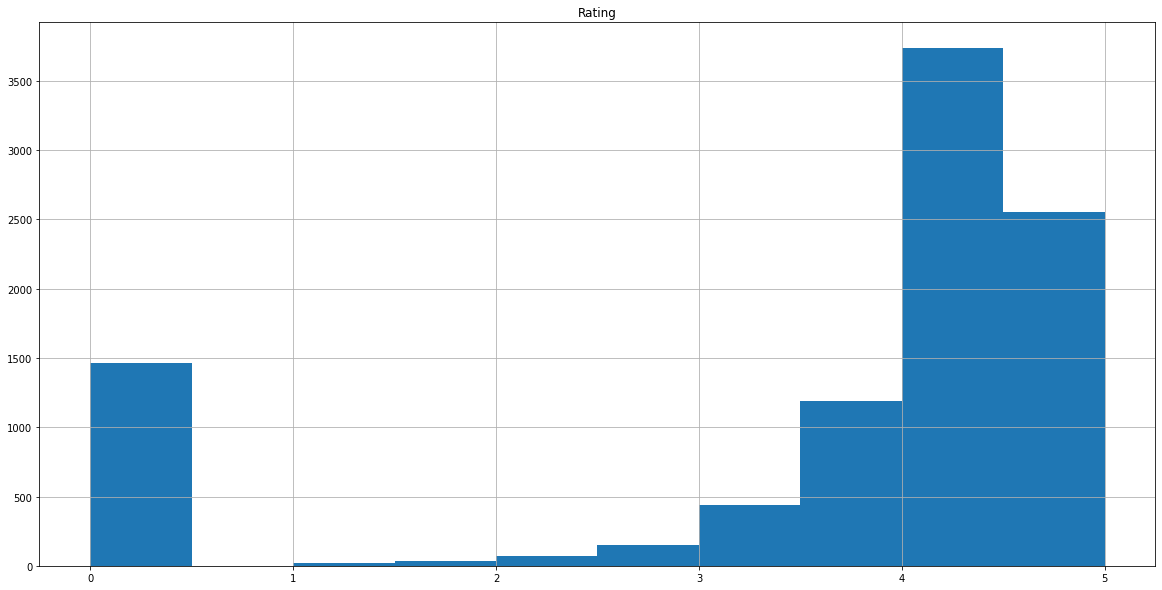

In [ ]:
#Taking out the histogram as per the rating 
df.hist();


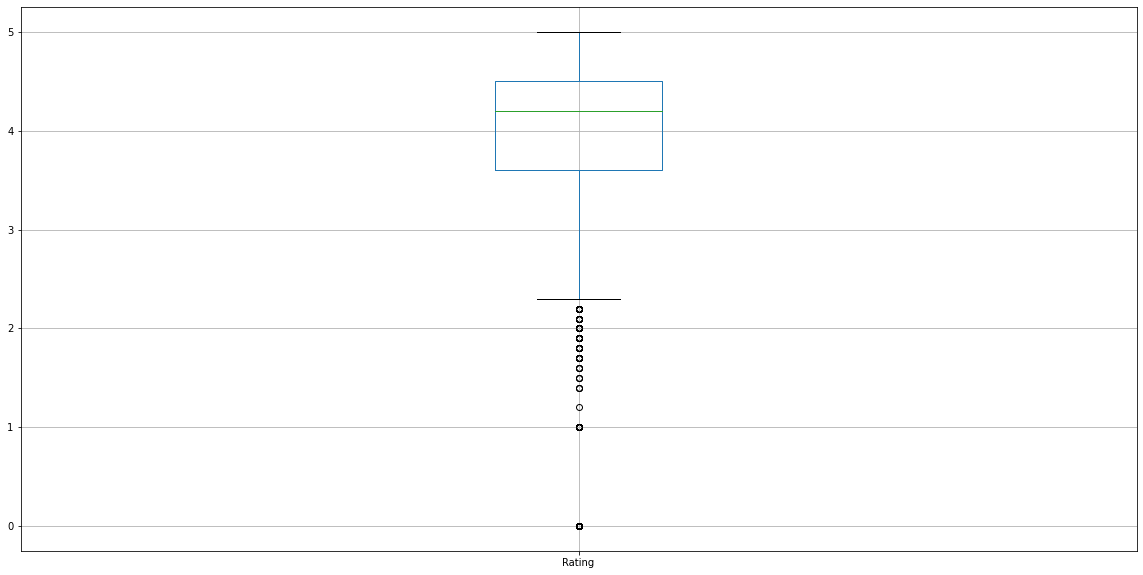

In [ ]:
#checking the reating with box plot
df.boxplot()

#**Review**

In [ ]:
df['Reviews'].head(10)

0       159
1       967
2     87510
3    215644
4       967
5       167
6       178
7     36815
8     13791
9       121
Name: Reviews, dtype: object

In [ ]:
#taking the unique values from Reviews
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
#checking data type of Reviews 
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
#converting data type from object to float
df['Reviews']= df['Reviews'].replace('0.0',0)
df['Reviews']=df['Reviews'].replace('3.0M',3000000)
df['Reviews']=df['Reviews'].astype(float)

In [ ]:
#checking tthe converted data type
df['Reviews'].dtype

dtype('float64')

In [ ]:
df['Reviews'].describe()

count    9.659000e+03
mean     2.165926e+05
std      1.831320e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.670000e+02
75%      2.940100e+04
max      7.815831e+07
Name: Reviews, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


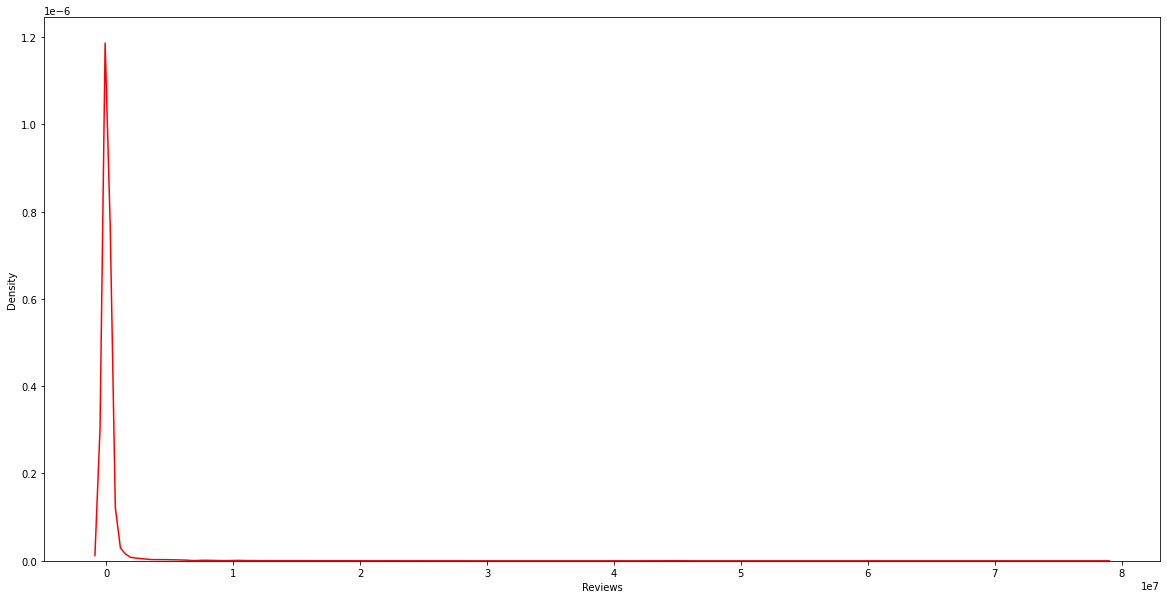

In [ ]:
sns.distplot(df['Reviews'], hist=False,color='red')

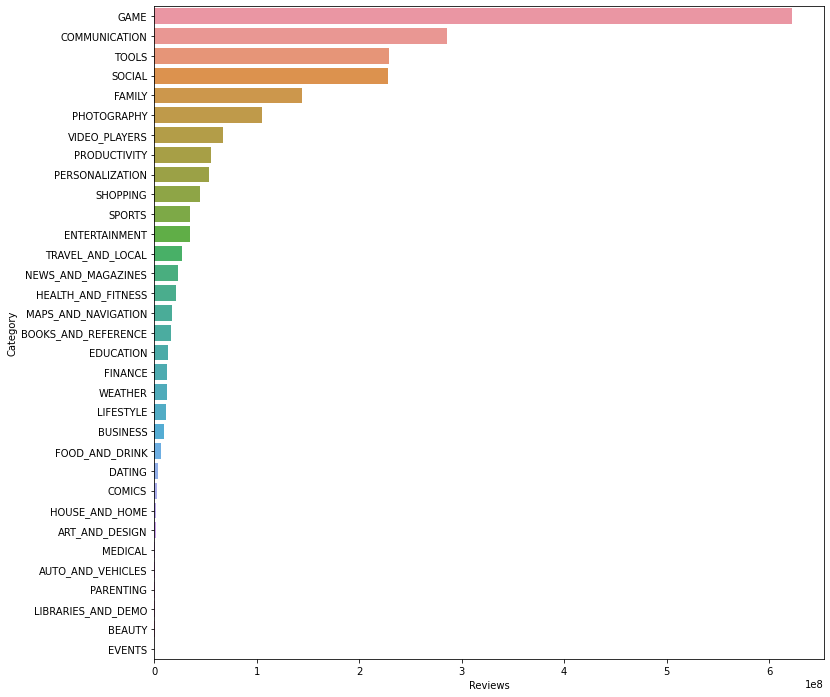

In [ ]:
plt.figure(figsize=(12,12))
sum_inst = df.groupby(['Category'])['Reviews'].sum().sort_values(ascending=False)
sns.barplot(x=sum_inst, y=sum_inst.index, data=df)

#**Size**

In [33]:
df['Size'].head(20)

0      19M
1      14M
2     8.7M
3      25M
4     2.8M
5     5.6M
6      19M
7      29M
8      33M
9     3.1M
10     28M
11     12M
12     20M
13     21M
14     37M
15    2.7M
16    5.5M
17     17M
18     39M
19     31M
Name: Size, dtype: object

In [34]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
def convert_size(size):
  '''
  This convert all the valid entry from kb to mb and return the result in float data type.
  '''
  try:
    if 'M' in size:
      return float(size[:1])
    elif 'k' in size:
      return round(float(size[:1])/1024 , 3)  
    else:
      return size
  except:
      return size

In [ ]:
df['Size']= df['Size'].apply( lambda x: convert_size(x))
df['Size'].head()

0    1.0
1    1.0
2    8.0
3    2.0
4    2.0
Name: Size, dtype: object

In [42]:
df['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

#**Installs**

In [ ]:
df['Installs'].head(10)

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
5        50,000+
6        50,000+
7     1,000,000+
8     1,000,000+
9        10,000+
Name: Installs, dtype: object

In [ ]:
#Taking the unique installs 
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
#replacing the special carecter and converting it to float
df['Installs']=df['Installs'].str.replace(',','')
df['Installs']=df['Installs'].str.replace('+','')
df['Installs']=df['Installs'].replace('Free',np.NaN)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df['Installs']=df['Installs'].astype(float)
df['Installs'].dtype

dtype('float64')

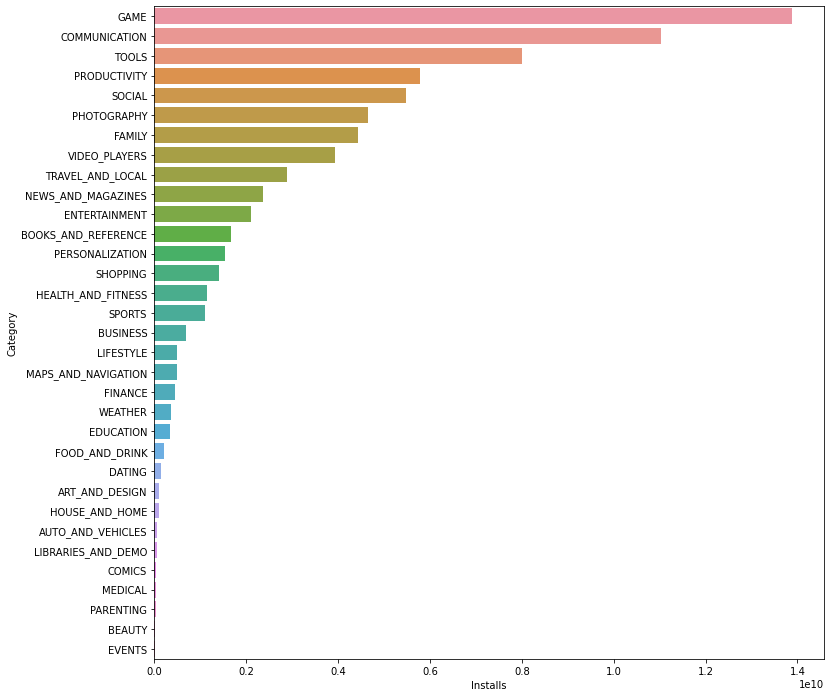

In [ ]:
plt.figure(figsize=(12,12))
sum_inst = df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False)
sns.barplot(x=sum_inst, y=sum_inst.index, data=df)

#**Type**

In [ ]:
df['Type'].tail(10)

10831    Free
10832    Free
10833    Free
10834    Free
10835    Free
10836    Free
10837    Free
10838    Free
10839    Free
10840    Free
Name: Type, dtype: object

In [ ]:
#Taking unique type of app
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [ ]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd5cc4021d0>,
 [Text(-1.0704934832131052, 0.2530685725219024, 'Free'),
  Text(1.0704200757176496, -0.25337888921656726, 'Paid'),
  Text(1.0999999537549277, -0.00031896576173441897, '0')],
 [Text(-0.5839055362980573, 0.13803740319376492, '92.6%'),
  Text(0.5838654958459907, -0.1382066668454003, '7.4%'),
  Text(0.599999974775415, -0.00017398132458241035, '0.0%')])

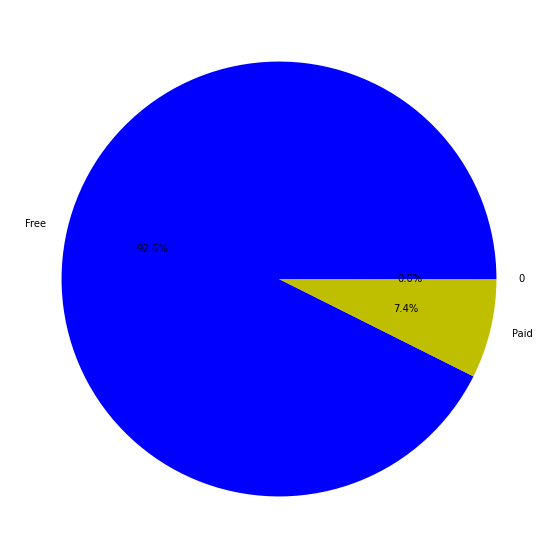

In [ ]:
#ploting free and paid app
plt.figure(figsize=(10,10))
labels= df['Type'].value_counts(sort = True).index
Size= df['Type'].value_counts()
colors = ['b','y','b']
plt.pie(Size,labels=labels, autopct='%.1f%%' ,colors=colors)

#**Price**


In [ ]:
#checking unique elements 
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

In [ ]:
#checking value count for perticular price
df['Price'].value_counts()


0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: Price, Length: 93, dtype: int64

In [ ]:
#replacing special character
df['Price'] = df['Price'].str.replace("$" , "")
df['Price']=df['Price'].replace("Everyone" , "_")
df['Price'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


dtype('O')

In [ ]:
#re-checking the value 
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26', ' ,',
       '1.20', '1.04'], dtype=object)

Text(0.5, 0, 'Price')

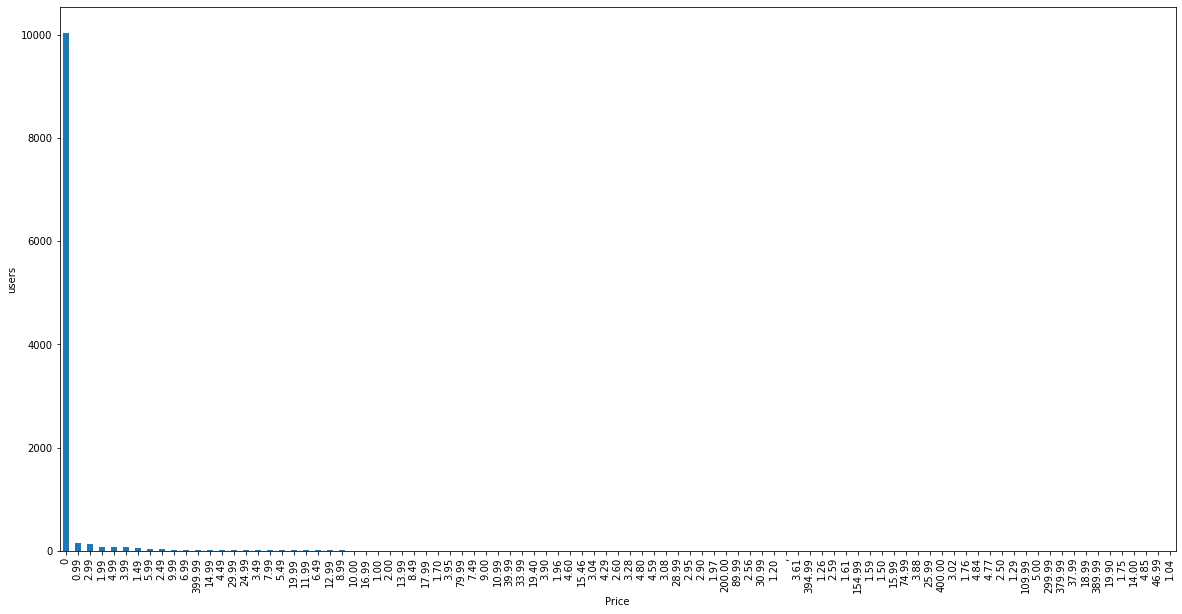

In [ ]:
#grap in bases on price
plt.rcParams['figure.figsize'] = (20, 10)
df['Price'].value_counts().plot(kind='bar')
plt.ylabel('users')
plt.xlabel('Price')

#**content rating**

In [ ]:
df["Content Rating"].head()

0    Everyone
1    Everyone
2    Everyone
3        Teen
4    Everyone
Name: Content Rating, dtype: object

In [ ]:
#checking unique values
df["Content Rating"].unique()


array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [ ]:
#taking out the value count for each element 
df["Content Rating"].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Text(0.5, 0, 'Users')

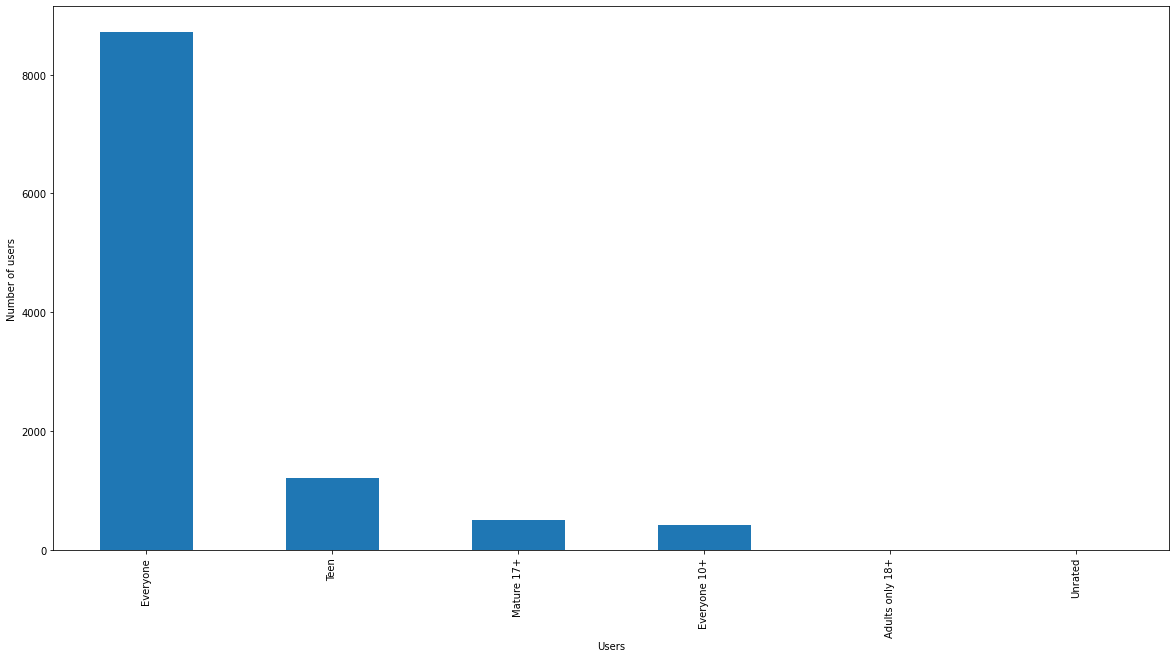

In [ ]:
#ploting content rating 
plt.rcParams['figure.figsize'] = (20, 10)
df['Content Rating'].value_counts().plot(kind='bar')
plt.ylabel('Number of users')
plt.xlabel('Users')

#**Genres**

In [ ]:
#checking first 5 columns
df['Genres'].head()

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
Name: Genres, dtype: object

In [ ]:
#checking unique values
df["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [ ]:
#checking value count of geners
df['Genres'].value_counts()

Tools                     842
Entertainment             623
Education                 549
Medical                   463
Business                  460
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: Genres, Length: 120, dtype: int64

Text(0.5, 0, 'Genre')

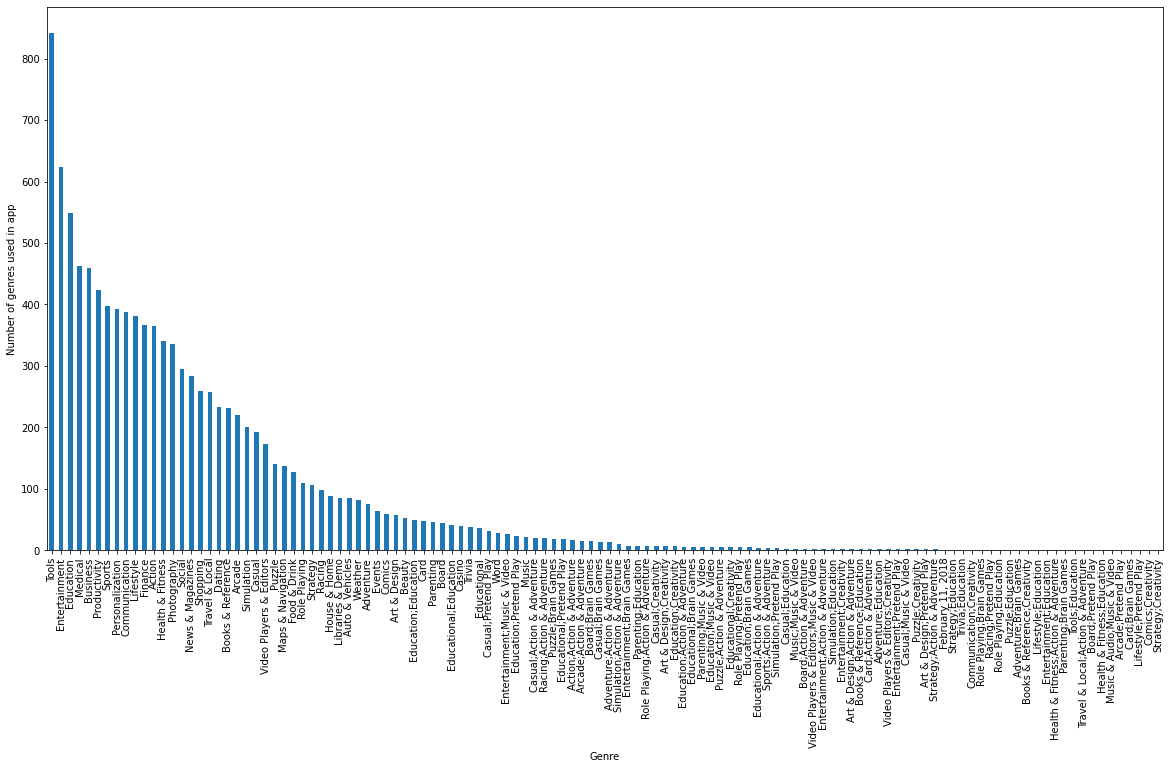

In [ ]:
#ploting graph which genres is used most
plt.rcParams['figure.figsize'] = (20, 10)
df['Genres'].value_counts().plot(kind='bar')
plt.ylabel('Number of genres used in app')
plt.xlabel('Genre')

#**Last updated**

In [ ]:
df["Last Updated"].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [ ]:
df["Last Updated"].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
df["Last Updated"].value_counts()

August 3, 2018        326
August 2, 2018        304
July 31, 2018         294
August 1, 2018        285
July 30, 2018         211
                     ... 
March 20, 2014          1
April 7, 2015           1
September 22, 2014      1
October 3, 2015         1
March 23, 2014          1
Name: Last Updated, Length: 1378, dtype: int64

#**Current ver**

In [ ]:
#checking first columns
df['Current Ver'].head()

0                 1.0.0
1                 2.0.0
2                 1.2.4
3    Varies with device
4                   1.1
Name: Current Ver, dtype: object

In [ ]:
#checking out the unique va;lues
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [ ]:
#checking value count of current ver
df['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
1.0.17.3905              1
15.1.2                   1
4.94.19                  1
1.1.11.11                1
2.0.148.0                1
Name: Current Ver, Length: 2832, dtype: int64

#**Android ver**

In [ ]:
#taking firt 5 elements
df["Android Ver"].head()

0    4.0.3 and up
1    4.0.3 and up
2    4.0.3 and up
3      4.2 and up
4      4.4 and up
Name: Android Ver, dtype: object

In [ ]:
#checking out the unique values
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up', 'nan',
       '2.2 and up', '5.0 and up', '6.0 and up', '1.6 and up',
       '1.5 and up', '2.1 and up', '7.0 and up', '5.1 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '7.1 and up', '7.0 - 7.1.1', '8.0 and up',
       '5.0 - 8.0', '3.1 and up', '2.0.1 and up', '4.1 - 7.1.1', nan,
       '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

In [ ]:
#Taking the values for android ver
df['Android Ver'].value_counts()

Text(0.5, 0, 'Android Ver')

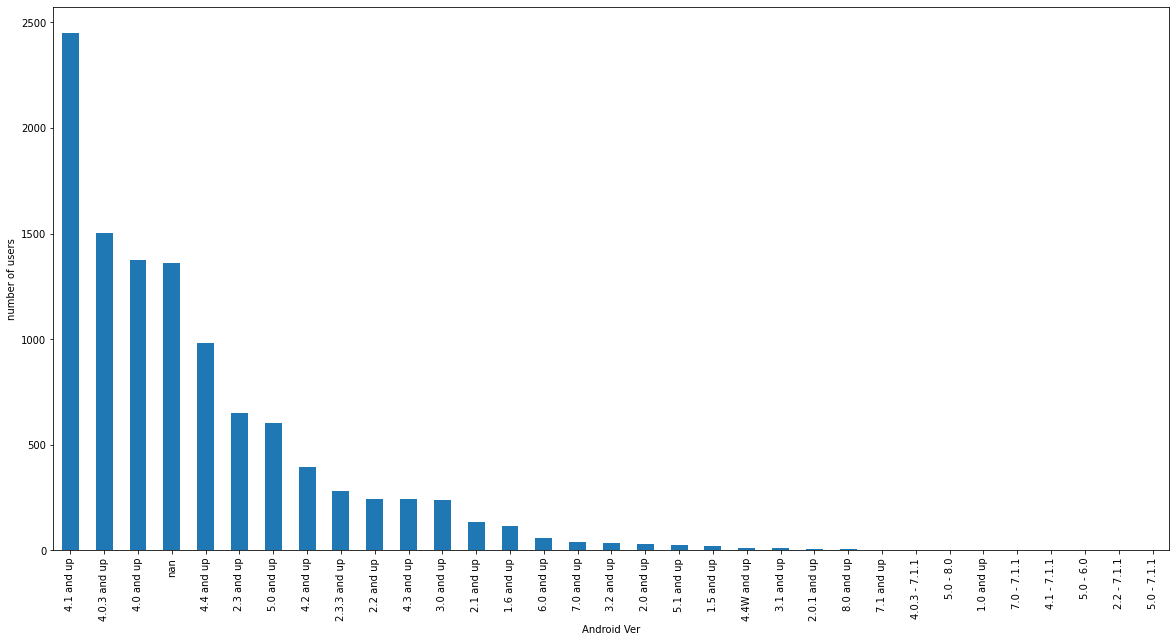

In [ ]:
#grap for Android Ver
plt.rcParams['figure.figsize'] = (20, 10)
df['Android Ver'].value_counts().plot(kind='bar')
plt.ylabel('number of users')
plt.xlabel('Android Ver')

#**Importing new file and doing analysis on USER REVIEWS**

In [ ]:
File ='/content/drive/MyDrive/EDA/UserReviews.csv'
df=pd.read_csv(File)

In [ ]:
df.columns


Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [ ]:
df.shape

(64295, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


**USER REVIEWS dataframe has 5 rows and 64295 columns**

**App**- It will tell about the name of apps in data frame

**Translated_review**- I this we will know about the reivew in the perticular  
app

**Sentiment** - In this we will check the sentiment are positive or negative

**Sentiment_Polarity** -In this we will check the Sentiment_Polarity of each app

**Sentiment_Subjectivity** - In this we will check the Sentiment_Subjectivity of app

#*App*

In [ ]:
#checking first 5 elements
df['App'].head()

0    10 Best Foods for You
1    10 Best Foods for You
2    10 Best Foods for You
3    10 Best Foods for You
4    10 Best Foods for You
Name: App, dtype: object

In [ ]:
#taking unique elements 
df['App'].unique()

array(['10 Best Foods for You', '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室',
       '11st', ..., 'Hotwire Hotel & Car Rental App',
       'Housing-Real Estate & Property', 'Houzz Interior Design Ideas'],
      dtype=object)

In [ ]:
# taking the count of aaps
pd.value_counts(df['App'].values)

Angry Birds Classic                                  320
CBS Sports App - Scores, News, Stats & Watch Live    320
Bowmasters                                           320
8 Ball Pool                                          300
Helix Jump                                           300
                                                    ... 
Easy Healthy Recipes                                  31
Dresses Ideas & Fashions +3000                        31
Detector de Radares Gratis                            31
Easy Hair Style Design                                30
Drawing Clothes Fashion Ideas                         30
Length: 1074, dtype: int64

In [ ]:
#droping the duplicate App
df.drop_duplicates(['App'],inplace=True)
df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
200,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Great,Positive,0.800000,0.750000
240,11st,Horrible ID verification,Negative,-1.000000,1.000000
280,1800 Contacts - Lens Store,Great hassle free way order contacts. Got call...,Positive,0.600000,0.775000
360,1LINE – One Line with One Touch,"gets 1* there's ad every single level restart,...",Negative,-0.157143,0.704762
...,...,...,...,...,...
64076,Hotspot Shield Free VPN Proxy & Wi-Fi Security,7 days free trial asking credit card. Stupid!!!,Negative,-0.300000,0.900000
64116,Hotstar,running,Neutral,0.000000,0.000000
64156,Hotwire Hotel & Car Rental App,NaN,NaN,NaN,NaN
64196,Housing-Real Estate & Property,Incorrect listings. The agents show property d...,Negative,-0.025000,0.125000


In [ ]:
#counting the app after droping
pd.value_counts(df['App'].values)

10 Best Foods for You                        1
Fair: A New Way To Own A Car                 1
FOX Sports: Live Streaming, Scores & News    1
FP Notebook                                  1
FREE LIVE TALK                               1
                                            ..
Calls & Text by Mo+                          1
Calls Blacklist - Call Blocker               1
Calm - Meditate, Sleep, Relax                1
Calorie Counter & Diet Tracker               1
Houzz Interior Design Ideas                  1
Length: 1074, dtype: int64

In [ ]:
#checking the repreated values are drop or not 
df[df['App']=='Angry Birds Classic']

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
7352,Angry Birds Classic,Way many ads. I remember Angry Birds first cam...,Negative,-0.125,0.483333


#*Translated_review*

In [ ]:
df['Translated_Review'].head(5)

0      I like eat delicious food. That's I'm cooking ...
200                                                Great
240                             Horrible ID verification
280    Great hassle free way order contacts. Got call...
360    gets 1* there's ad every single level restart,...
Name: Translated_Review, dtype: object

In [ ]:
df['Translated_Review'].unique()

array(['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
       'Great', 'Horrible ID verification',
       'Great hassle free way order contacts. Got call reminding prescription expires tomorrow.',
       "gets 1* there's ad every single level restart, frustrating, potential",
       'Like The Old Version Better Where Backspace Is Beside P Letter And Emoji Is Below Capitalization.',
       'Terrible! Not user-friendly like original app. Please give customers option both. I look forward navigating cumbersome app. Namaste!',
       'This good dating app, I love much. This lot Chinese English speaking members. Most active I chat requests soon registered. There advertising, I chat others members freely. I used different dating apps, functions simple direct one. Users exchanged contact easily. Those guys met nice, gentle serious. Feeling good it. Hopefully every enjoy using app.',
       'Thanks lot excellent map

In [ ]:
df['Translated_Review'].value_counts()

Love                                                                                                                                                                                                                                                                                                                                                                          2
I like eat delicious food. That's I'm cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"                                                                                                                                                                                                                                                    1
I love game think fun. I enjoy able see different characters trying make happy make vault best be. The issue I buy Mr Gutsys I could stop playing game can't auto collect without means can't play day two vault dies. But amazing game really good idea moble.         

#*Sentiment*

In [ ]:
#checking the head of sentiment
df['Sentiment'].head()

0    Positive
1    Positive
2         NaN
3    Positive
4    Positive
Name: Sentiment, dtype: object

In [ ]:
df['Sentiment'].shape

(1074,)

In [ ]:
#value count of sentiment
df['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

Text(0.5, 0, 'review sentiment')

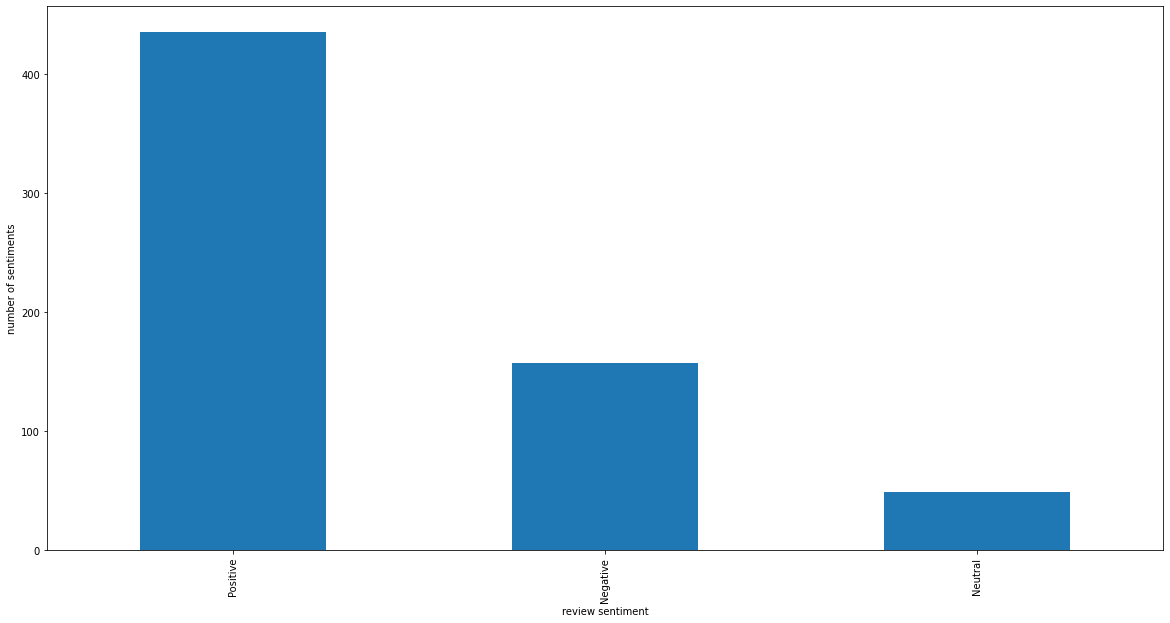

In [ ]:
#bar graph
plt.rcParams['figure.figsize'] = (20, 10)
df['Sentiment'].value_counts().plot(kind='bar')
plt.ylabel('number of sentiments')
plt.xlabel('review sentiment')

([<matplotlib.patches.Wedge at 0x7f9007890350>,
 [Text(-0.5853982712746089, 0.9312941876704157, 'Positive'),
  Text(0.37864231865312165, -1.138696620933332, 'Negative'),
  Text(1.1655618987894556, -0.28542154804835385, 'Neutral')],
 [Text(-0.31930814796796847, 0.5079786478202267, '67.9%'),
  Text(0.22087468588098763, -0.6642396955444435, '24.5%'),
  Text(0.6799111076271824, -0.1664959030282064, '7.6%')])

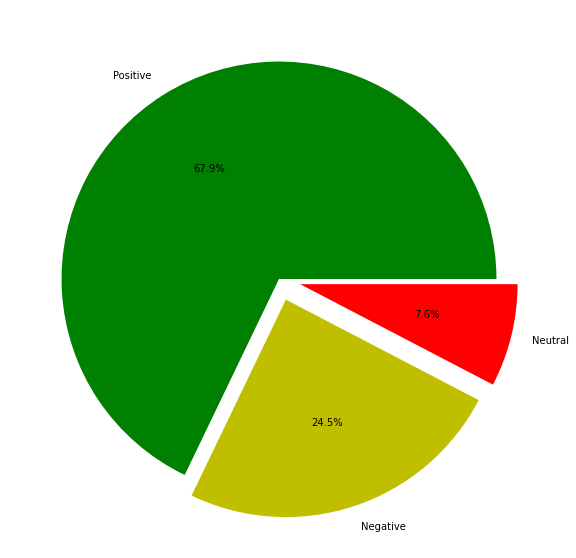

In [ ]:
#pie chat
plt.figure(figsize=(10,10))
labels= df['Sentiment'].value_counts(sort = True).index
Size= df['Sentiment'].value_counts()
colors = ['g','y','r']
explode= [0,0.1,0.1]
plt.pie(Size,labels=labels, autopct='%.1f%%' ,colors=colors,explode=explode)

#*Sentiment_Polarity*

In [ ]:
df['Sentiment_Polarity'].head()

0      1.000000
200    0.800000
240   -1.000000
280    0.600000
360   -0.157143
Name: Sentiment_Polarity, dtype: float64

In [ ]:
df["Sentiment_Polarity"].unique()

In [ ]:
df['Sentiment_Polarity'].value_counts().round(2)

 0.000000    49
 0.500000    14
 0.300000    12
 1.000000    11
 0.700000     9
             ..
-0.080357     1
-0.010008     1
 0.280556     1
 0.350000     1
-0.300000     1
Name: Sentiment_Polarity, Length: 436, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f900785dc50>]],
      dtype=object)

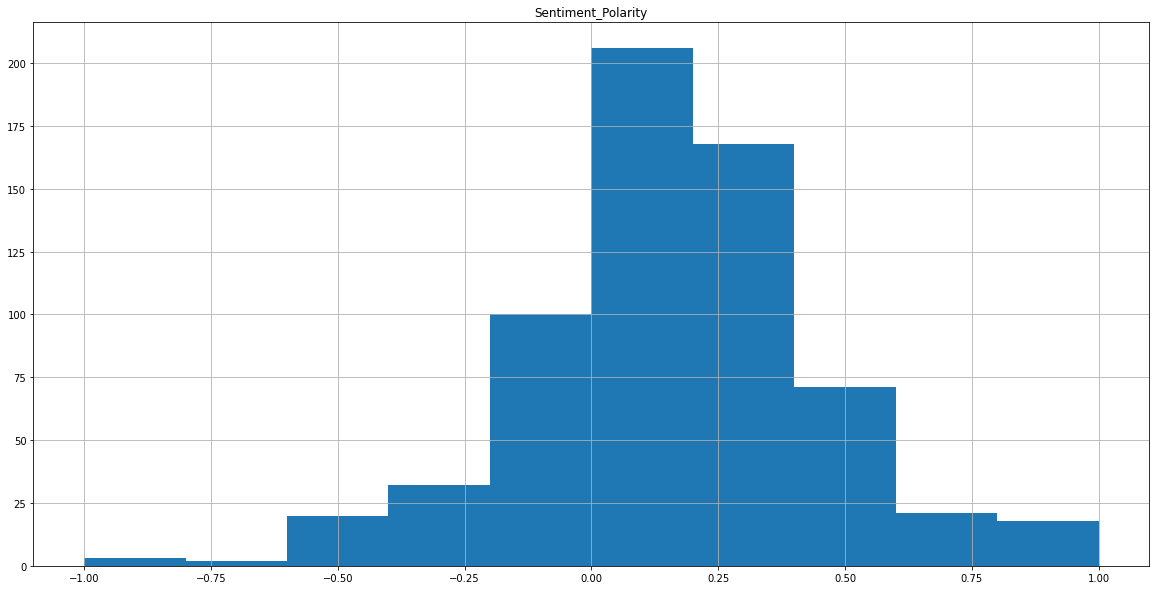

In [ ]:
#determines the sentimental aspect of an opinion
df.hist('Sentiment_Polarity')

#*Sentiment_Subjectivity*

In [ ]:
df['Sentiment_Subjectivity'].head()

0      0.533333
200    0.750000
240    1.000000
280    0.775000
360    0.704762
Name: Sentiment_Subjectivity, dtype: float64

In [ ]:
df['Sentiment_Subjectivity'].unique()

In [ ]:
df['Sentiment_Subjectivity'].value_counts()

0.000000    40
0.500000    20
1.000000    17
0.600000    12
0.600000    11
            ..
0.418054     1
0.719444     1
0.550230     1
0.290000     1
0.125000     1
Name: Sentiment_Subjectivity, Length: 410, dtype: int64

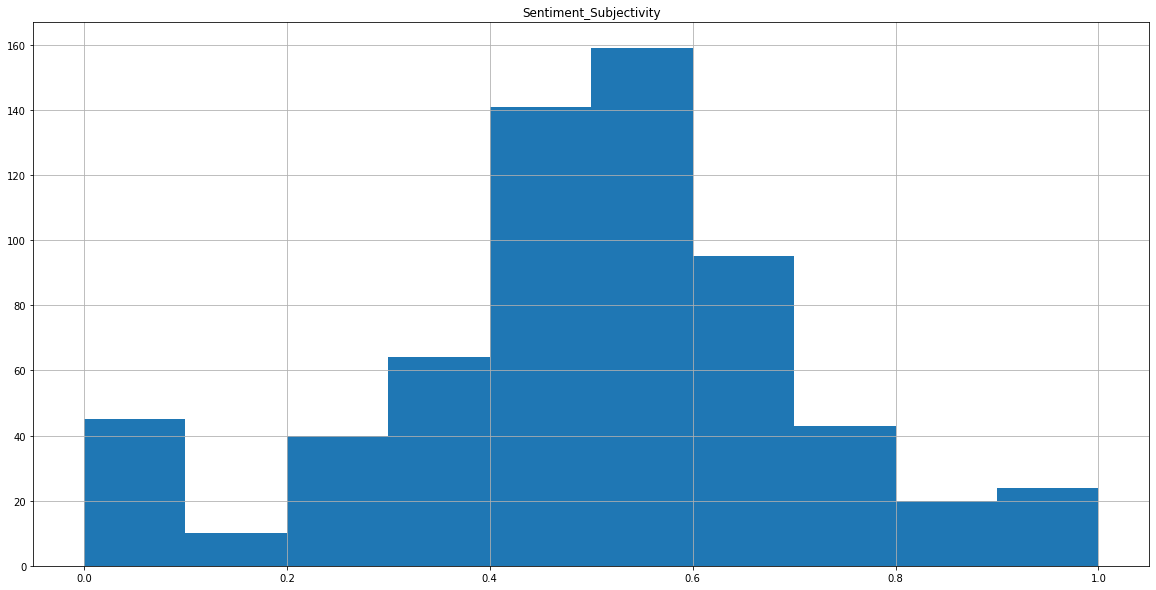

In [ ]:
#Revies as per Sentiment_Subjectivity
df.hist('Sentiment_Subjectivity');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


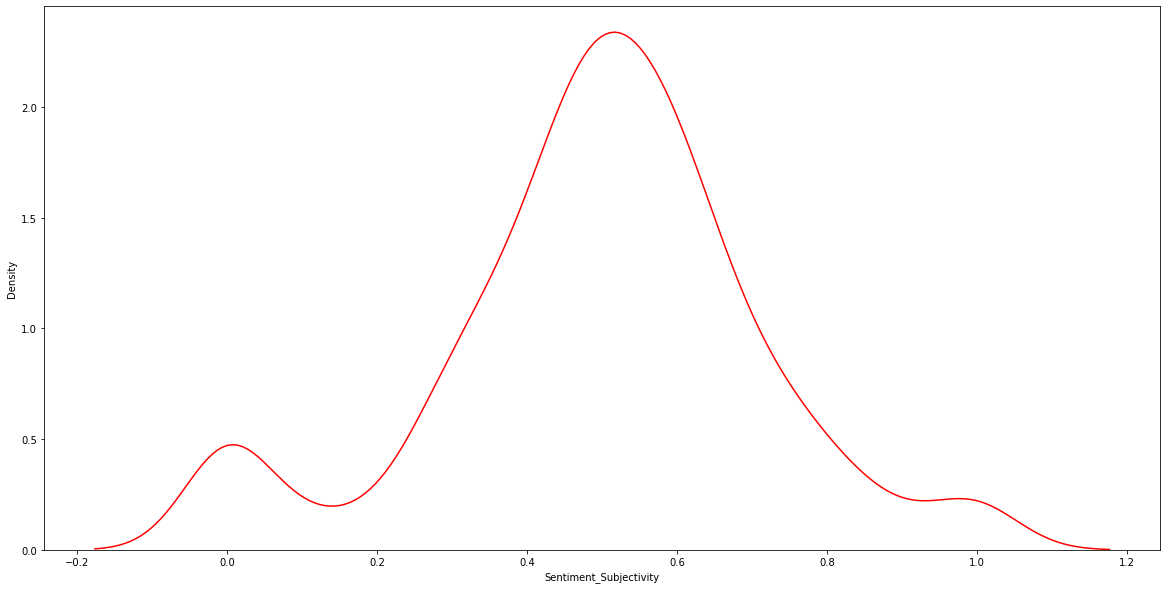

In [ ]:
sns.distplot(df['Sentiment_Subjectivity'], hist=False,color='red')

#***************************************************END***********************